# Set up atmospheric forcing from CESM2 experiment output

Variables available etc.: https://docs.google.com/spreadsheets/u/1/d/1OPcJsTcpaxBVZqcRpEEf16cipuL3CUk2nWojQ_ulRjE/edit?gid=0#gid=0

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.file_io import find_cesm2_file
from nemo_python_git.forcing import cesm2_expt_all_atm_forcing

In [2]:
base_folder = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'

In [6]:
# glob.glob(f'/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_icebergs_off/files/*grid_T*')[7:]
glob.glob(f'/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test6/files_spinup/*grid_T*')[7:13]

['/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test6/files_spinup/eANT025.L121_1m_19860101_19861231_grid_T.nc',
 '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test6/files_spinup/eANT025.L121_1m_19870101_19871231_grid_T.nc',
 '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test6/files_spinup/eANT025.L121_1m_19880101_19881231_grid_T.nc',
 '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test6/files_spinup/eANT025.L121_1m_19890101_19891231_grid_T.nc',
 '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test6/files_spinup/eANT025.L121_1m_19900101_19901231_grid_T.nc',
 '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test6/files_spinup/eANT025.L121_1m_19910101_19911231_grid_T.nc']

In [10]:
file_path = find_cesm2_file('LE2', 'SALT', 'ocn', 'monthly', '1011.001', 1850)

In [3]:
file_path  = find_cesm2_file('LE2', 'snow', 'ice', 'monthly', '1011.001', 1850)
file_path2 = find_cesm2_file('LE2', 'aice', 'ice', 'monthly', '1011.001', 1850)
file_path3 = find_cesm2_file('LE2', 'PRECSC', 'atm', 'daily', '1011.001', 2005)
file_path4 = find_cesm2_file('LE2', 'PRECSL', 'atm', 'daily', '1011.001', 2005)

In [4]:
ds  = xr.open_dataset(file_path)
ds2 = xr.open_dataset(file_path2)
ds3 = xr.open_dataset(file_path3).sel(lat=slice(-90,-50))
ds4 = xr.open_dataset(file_path4).sel(lat=slice(-90,-50))

In [5]:
snow_fall_rate = (ds3.PRECSC + ds4.PRECSL)*1e3 # m of water / s * 1000 kg /m3 = kg/m2/s

In [3]:
CESM2_mask = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h0.LANDFRAC.185001-185912.nc').LANDFRAC
ERA5_mask  = xr.open_dataset(f'{base_folder}ERA5-forcing/ERA5-landmask.nc').isel(time=0)

In [4]:
def plot_radiation_distr(ds, var, xlim=(0,1000), ylim=(None,None), nbins=15):
    fig, ax = plt.subplots(3,4, figsize=(20,13))
    for n, axis in enumerate(ax.ravel()):
        print(n)
        xr.plot.hist(ds[var].isel(time=(ds.time.dt.month==n+1)), bins=nbins, xlim=xlim, ylim=ylim, ax=axis)
        axis.set_title(f'Month: {n+1}')

        if n < 8: axis.set_xlabel('')

    return fig, ax

In [39]:
ERA5_daily = ds_ERA5.resample(time='24H').mean()

In [ ]:
var_ERA5  = 'msdwswrf'
ds_ERA5   = xr.open_mfdataset(glob.glob(f'{base_folder}ERA5-forcing/drowned_1h/{var_ERA5}_y1979m*'), chunks='auto')
ds_ERA5_masked = ds_ERA5.where(ERA5_mask.lsm == 0)

fig, ax = plot_radiation_distr(ds_ERA5_masked.sel(latitude=slice(-50,-90)), var_ERA5, xlim=(0,600), ylim=(0,1.4e7))
fig.suptitle('ERA5 hourly shortwave radiation forcing 1850')

0
1
2
3
4
5
6
7
8
9
10
11


Text(0.5, 0.98, 'ERA5 hourly longwave radiation forcing 1850')

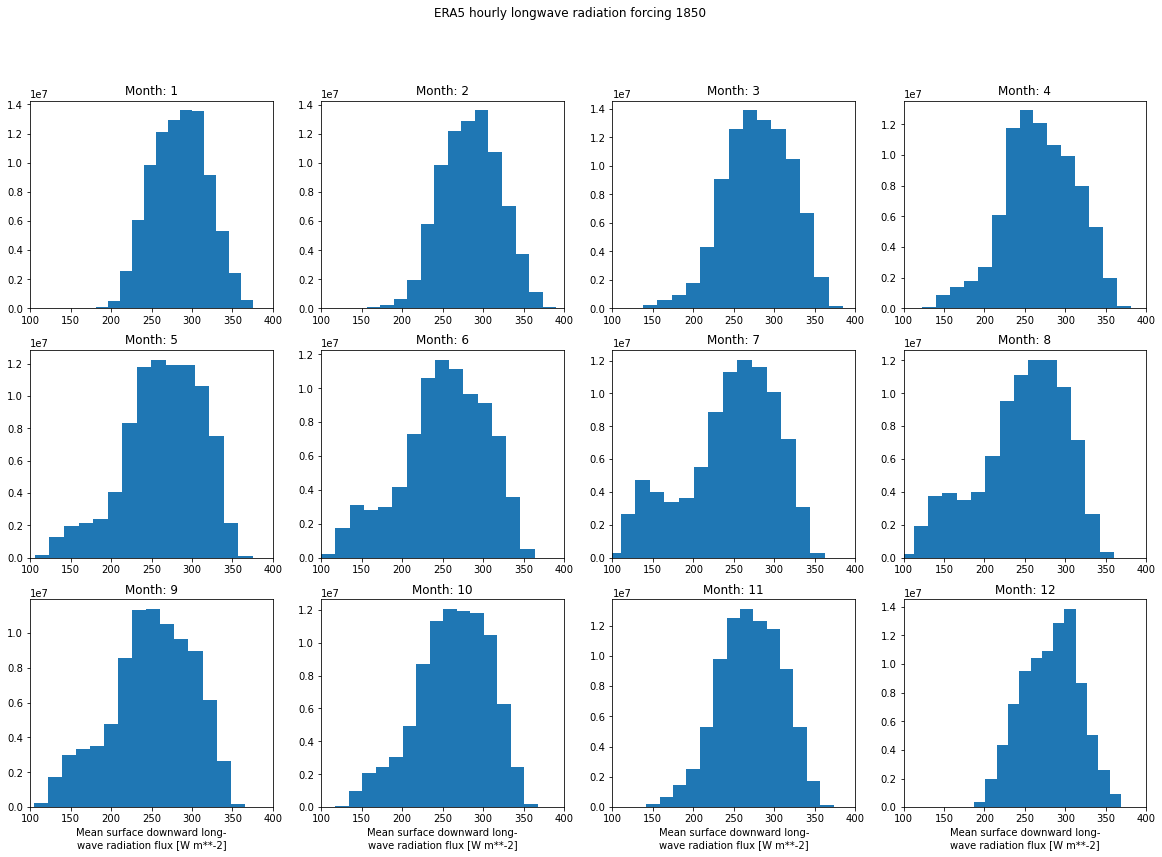

In [5]:
var_ERA5  = 'msdwlwrf'
ds_ERA5   = xr.open_mfdataset(glob.glob(f'{base_folder}ERA5-forcing/drowned_1h/{var_ERA5}_y1979m*'), chunks='auto')
ds_ERA5_masked = ds_ERA5.where(ERA5_mask.lsm == 0)

fig, ax = plot_radiation_distr(ds_ERA5_masked.sel(latitude=slice(-50,-90)), var_ERA5, xlim=(100,400), ylim=(0,1.4e7))
fig.suptitle('ERA5 hourly longwave radiation forcing 1850')

0
1
2
3
4
5
6
7
8
9
10
11


Text(0.5, 0.98, 'CESM2 daily shortwave radiation forcing 1850')

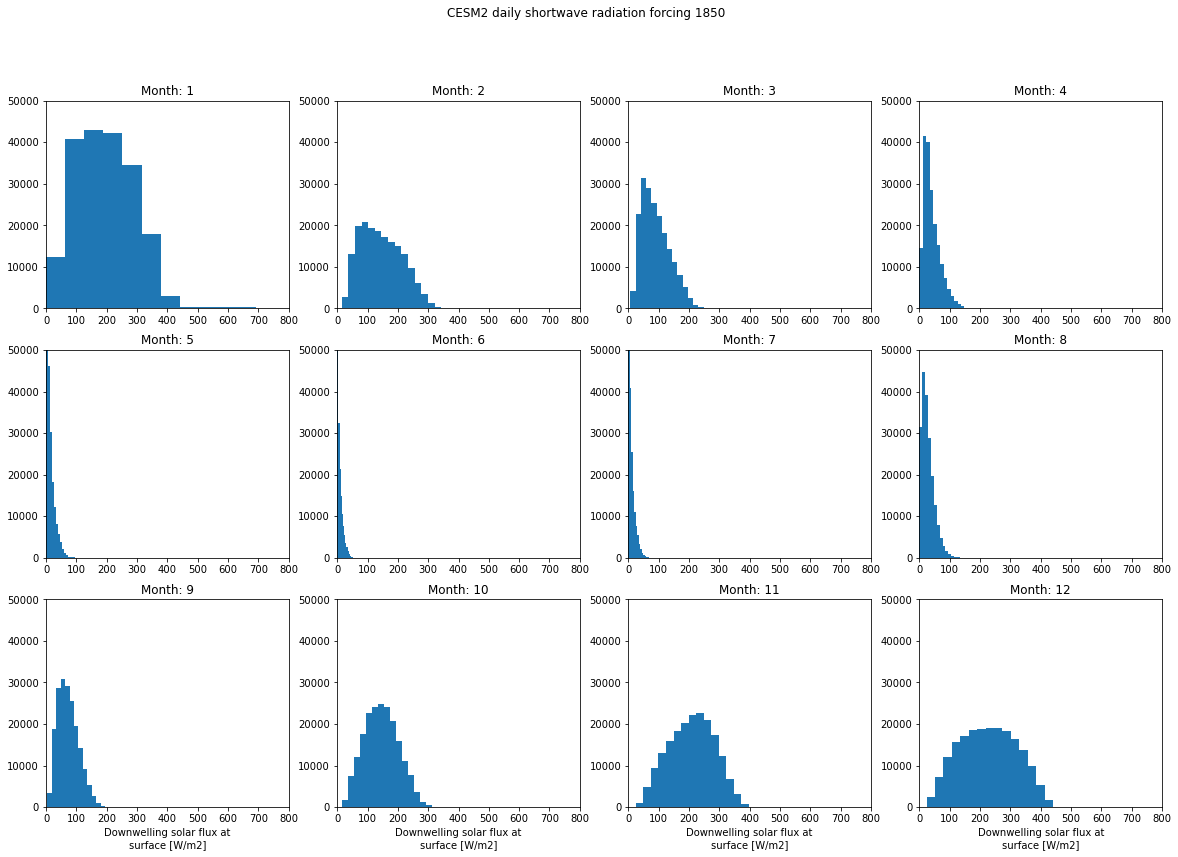

In [12]:
var_CESM2 = 'FSDS'
ds_CESM2   = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/processed/CESM2-LE2_ens1011.001_{var_CESM2}_y1850.nc')
CESM2_mask = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h0.LANDFRAC.185001-185912.nc').LANDFRAC
ds_CESM2_masked = ds_CESM2.where(CESM2_mask.isel(time=0) == 0)

fig, ax = plot_radiation_distr(ds_CESM2_masked.sel(lat=slice(-90,-50)), var_CESM2, xlim=(0,800), ylim=(0,50000))
fig.suptitle('CESM2 daily shortwave radiation forcing 1850')

0
1
2
3
4
5
6
7
8
9
10
11


Text(0.5, 0.98, 'CESM2 daily longwave radiation forcing 1850')

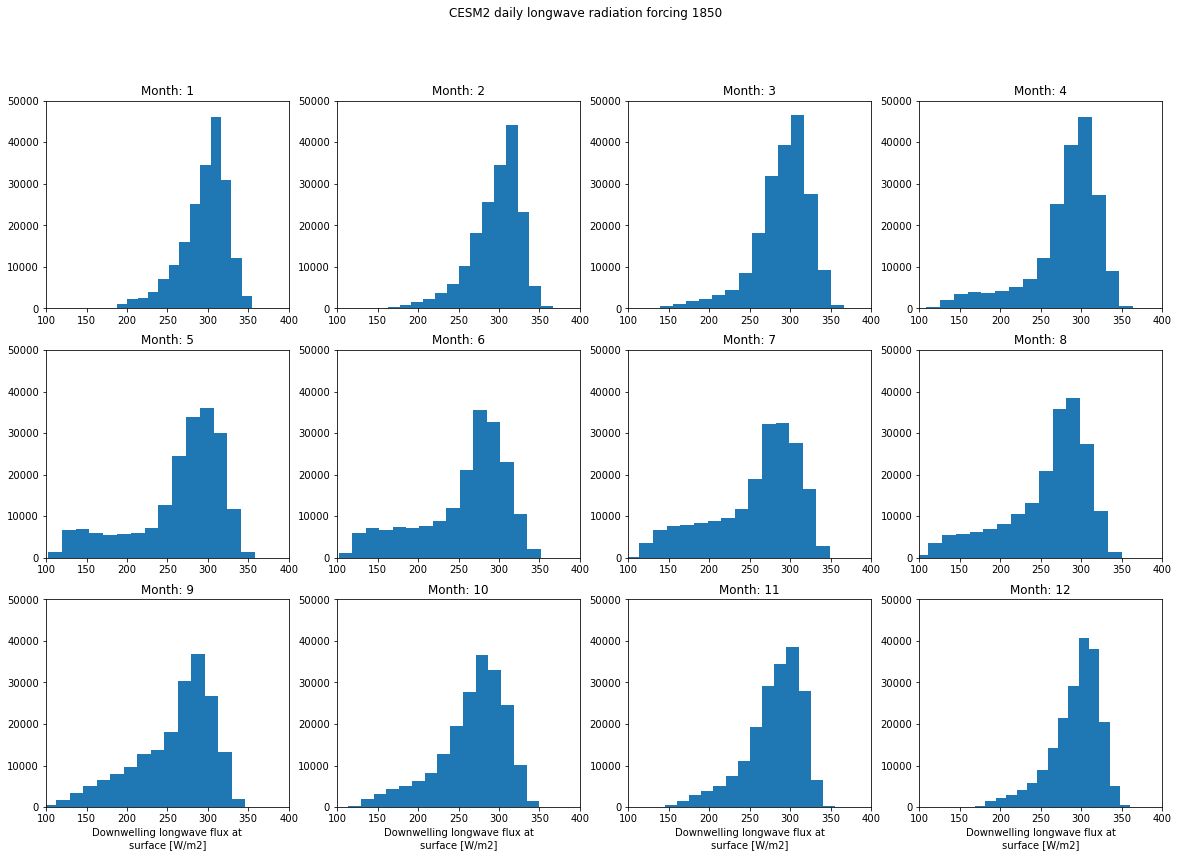

In [9]:
var_CESM2 = 'FLDS'
ds_CESM2   = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/processed/CESM2-LE2_ens1011.001_{var_CESM2}_y1850.nc')
CESM2_mask = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h0.LANDFRAC.185001-185912.nc').LANDFRAC
ds_CESM2_masked = ds_CESM2.where(CESM2_mask.isel(time=0) == 0)

fig, ax = plot_radiation_distr(ds_CESM2_masked.sel(lat=slice(-90,-50)), var_CESM2, xlim=(100,400), ylim=(0,50000))
fig.suptitle('CESM2 daily longwave radiation forcing 1850')

(array([4.6539507e+07, 1.3756095e+07, 1.0692741e+07, 9.2177220e+06,
        8.4508330e+06, 7.9612370e+06, 7.4890780e+06, 6.8817860e+06,
        6.1756260e+06, 5.1293960e+06, 3.9761530e+06, 2.3022840e+06,
        8.4004500e+05, 2.0777700e+05, 1.4280000e+04]),
 array([6.1035156e-05, 6.8930885e+01, 1.3786171e+02, 2.0679253e+02,
        2.7572336e+02, 3.4465417e+02, 4.1358499e+02, 4.8251581e+02,
        5.5144666e+02, 6.2037744e+02, 6.8930829e+02, 7.5823914e+02,
        8.2716992e+02, 8.9610077e+02, 9.6503156e+02, 1.0339624e+03],
       dtype=float32),
 <BarContainer object of 15 artists>)

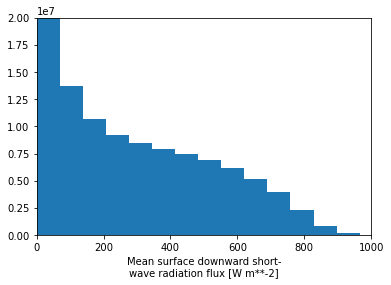

In [40]:
xr.plot.hist(ds_old.isel(time=slice(0,24*31)).sel(latitude=slice(-50,-80)),bins=15,ylim=(0,2e7), xlim=(0, 1000))

(array([ 10349.,  79126., 159544., 233436., 316046., 406277., 496078.,
        550480., 611560., 666279., 675132., 629543., 359457., 172211.,
         35922.]),
 array([ 22.136816,  48.098316,  74.059814, 100.02132 , 125.98282 ,
        151.94432 , 177.90582 , 203.86732 , 229.82883 , 255.79033 ,
        281.75183 , 307.71332 , 333.67484 , 359.63632 , 385.59784 ,
        411.55933 ], dtype=float32),
 <BarContainer object of 15 artists>)

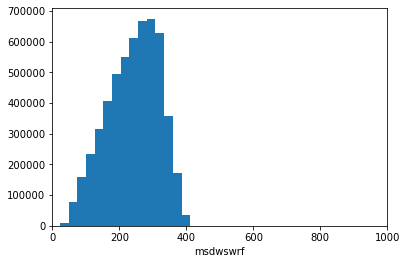

In [44]:
xr.plot.hist(ERA5_daily.sel(latitude=slice(-50,-80)),bins=15, xlim=(0, 1000))

(array([3.4870e+03, 1.5762e+04, 2.5148e+04, 2.6253e+04, 2.5417e+04,
        2.5567e+04, 2.4478e+04, 2.0797e+04, 1.5757e+04, 8.0370e+03,
        2.7660e+03, 3.4100e+02, 1.7300e+02, 1.9500e+02, 1.7800e+02,
        2.2300e+02, 1.9300e+02, 1.6100e+02, 9.3000e+01, 8.2000e+01,
        7.2000e+01, 5.2000e+01, 5.7000e+01, 3.1000e+01, 1.1000e+01]),
 array([  0.      ,  37.783577,  75.567154, 113.35073 , 151.13431 ,
        188.91788 , 226.70146 , 264.48505 , 302.26862 , 340.0522  ,
        377.83575 , 415.61935 , 453.40292 , 491.1865  , 528.9701  ,
        566.75366 , 604.53723 , 642.3208  , 680.1044  , 717.88794 ,
        755.6715  , 793.45514 , 831.2387  , 869.0223  , 906.80585 ,
        944.5894  ], dtype=float32),
 <BarContainer object of 25 artists>)

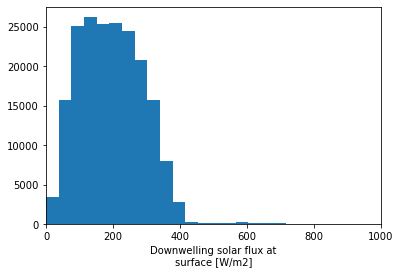

In [45]:
xr.plot.hist(ds_new_masked.isel(time=slice(0,31)).sel(lat=slice(-90,-50)),bins=25, xlim=(0,1000))

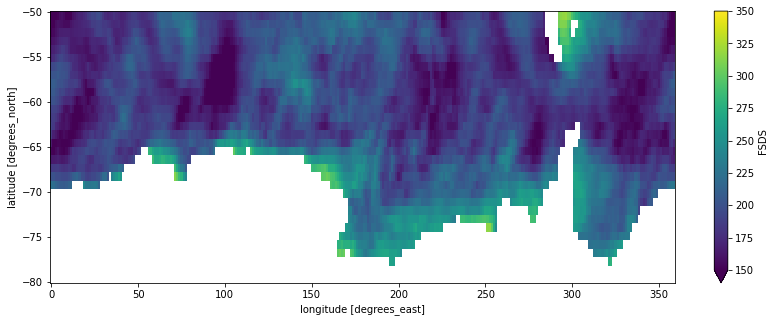

In [43]:
ds_new_masked.isel(time=slice(0,31)).mean(dim='time').sel(lat=slice(-80,-50)).plot(figsize=(14,5), vmin=150, vmax=350)

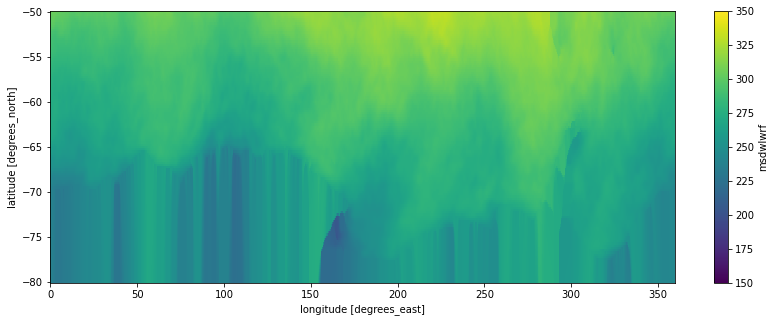

In [21]:
ds_old.isel(time=slice(0,24*31)).sel(latitude=slice(-50,-80)).mean(dim='time').plot(figsize=(14,5), vmin=150, vmax=350)

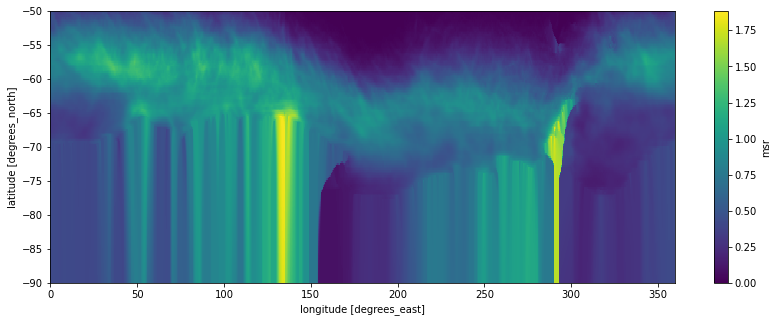

In [24]:
(ds_old.msr.sum(dim='time')*1e-3*3600*(8760/2208)).plot(figsize=(14,5), ylim=(-90, -50))

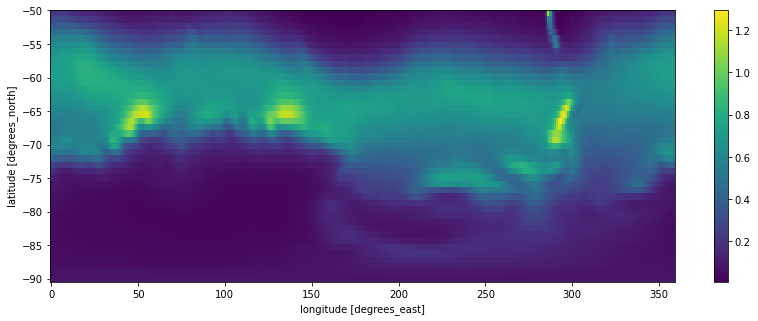

In [23]:
((ds3.PRECSC + ds4.PRECSL).sum(dim='time')*3600*24/10).plot(figsize=(14,5))

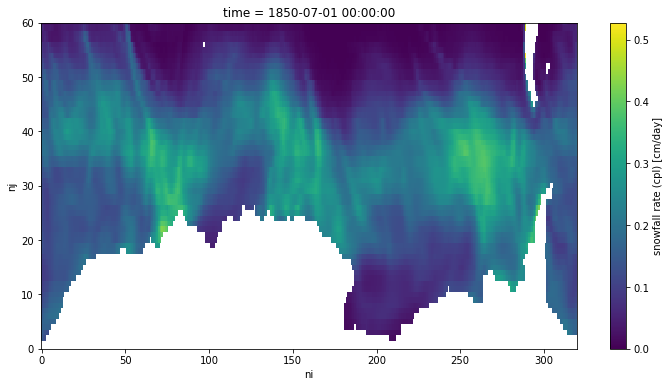

In [12]:
ds.snow.isel(time=5).plot(figsize=(12,6), ylim=(0,60))

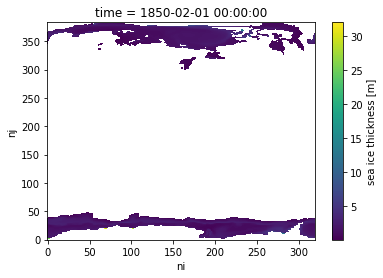

In [17]:
ds.sithick.isel(time=0).plot()

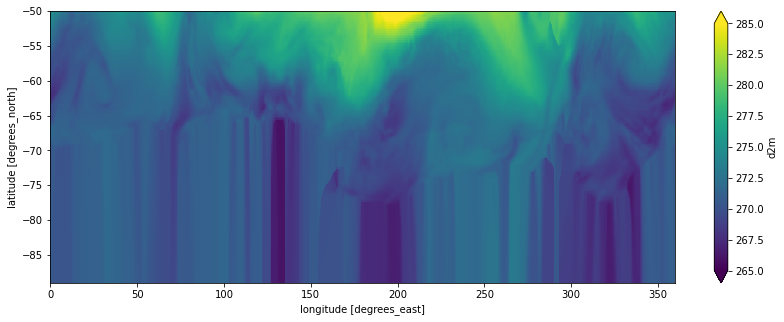

In [25]:
dsERA.isel(time=(dsERA.time.dt.day==1)).d2m.mean(dim='time').plot(ylim=(-89, -50), figsize=(14,5), vmin=265, vmax=285)

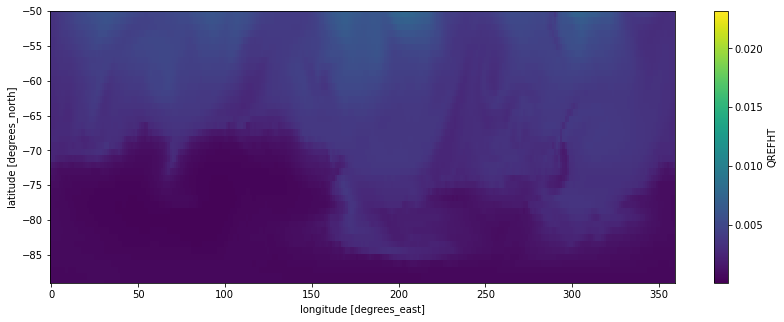

In [29]:
ds.QREFHT.isel(time=(ds.time.dt.year==1979)*(ds.time.dt.month==1)*(ds.time.dt.day==1)).mean(dim='time').plot(ylim=(-89, -50), figsize=(14,5))

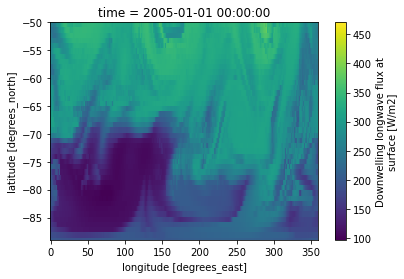

In [19]:
ds.FLDS.isel(time=365*5).plot(ylim=(-89, -50))

In [2]:
out_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/climate-forcing/CESM2/LE2/processed/'
cesm2_expt_all_atm_forcing('LE2', ens_strs=['1011.001'], out_dir=out_dir, start_year=1850, end_year=1850)

Processing ensemble member 1011.001
Processing UBOT
Processing VBOT
Processing FSDS
Processing FLDS
Processing TREFHT
Processing QREFHT
Processing PRECT
Processing PSL
